In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILE_APPLICATIONS = os.path.join("data", "applications.csv")
DATA_FILE_INDUSTRIES = os.path.join("data", "industries.csv")

df_applications = pd.read_csv(DATA_FILE_APPLICATIONS)
df_industries = pd.read_csv(DATA_FILE_INDUSTRIES)

df_applications

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726


In [2]:
df_industries.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [3]:
# 1. В ноутбуці завантаж таблицю з файлу applications.csv в Pandas DataFrame та почисти дані:
# •	Прибери дублікати applicant_id
df_applications.drop_duplicates(subset='applicant_id', inplace=True)

# •	В полі 'External Rating' заповни відсутні значення нулями
df_applications["External Rating"].fillna(0, inplace=True)

# •	В полі 'Education level' заповни відсутні значення текстом “Середня”
df_applications["Education level"].fillna("Середня", inplace=True)

In [4]:
# 2. Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.

df_merged = pd.merge(df_applications, df_industries, on="Industry", how="left")
df_merged.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15


In [5]:
# 3. Розрахуй рейтинг заявки за наступними умовами:
# •	Рейтинг має бути числом від 0 до 100
# •	Рейтинг - сума оцінок заявки по 6 критеріям.
# •	Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю.

df_merged["Rating"] = 0
df_merged["Applied at"] = pd.to_datetime(df_merged["Applied at"], format="mixed")
df_merged.loc[(df_merged["Age"] >= 35) & (df_merged["Age"] <= 55), "Rating"] += 20
df_merged.loc[df_merged["Applied at"].dt.dayofweek < 5, "Rating"] += 20
df_merged.loc[df_merged["Marital status"] == "Married", "Rating"] += 20
df_merged.loc[(df_merged["Location"] == "Kyiv") | (df_merged["Location"].str.contains("Київ чи область")), "Rating"] += 10
df_merged["Rating"] += df_merged["Score"]
df_merged.loc[df_merged["External Rating"] >= 7, "Rating"] += 20
df_merged.loc[df_merged["External Rating"] <= 2, "Rating"] -= 20
df_merged.loc[(df_merged["Amount"].isnull()) | (df_merged["External Rating"] == 0), "Rating"] = 0
df_merged["Rating"] = df_merged["Rating"].clip(lower=0, upper=100)
df_merged.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35


In [6]:
# 4. В результуючій таблиці залиш лише заявки з рейтингом більше нуля, ці заявки вважатимуться прийнятими. 

df_accepted = df_merged[df_merged['Rating'] > 0]

/var/folders/wg/3j33zdv17vscn36w6jv121zm0000gn/T/ipykernel_35847/2563102527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accepted['Week'] = df_accepted['Applied at'].dt.strftime('%U').astype(int)


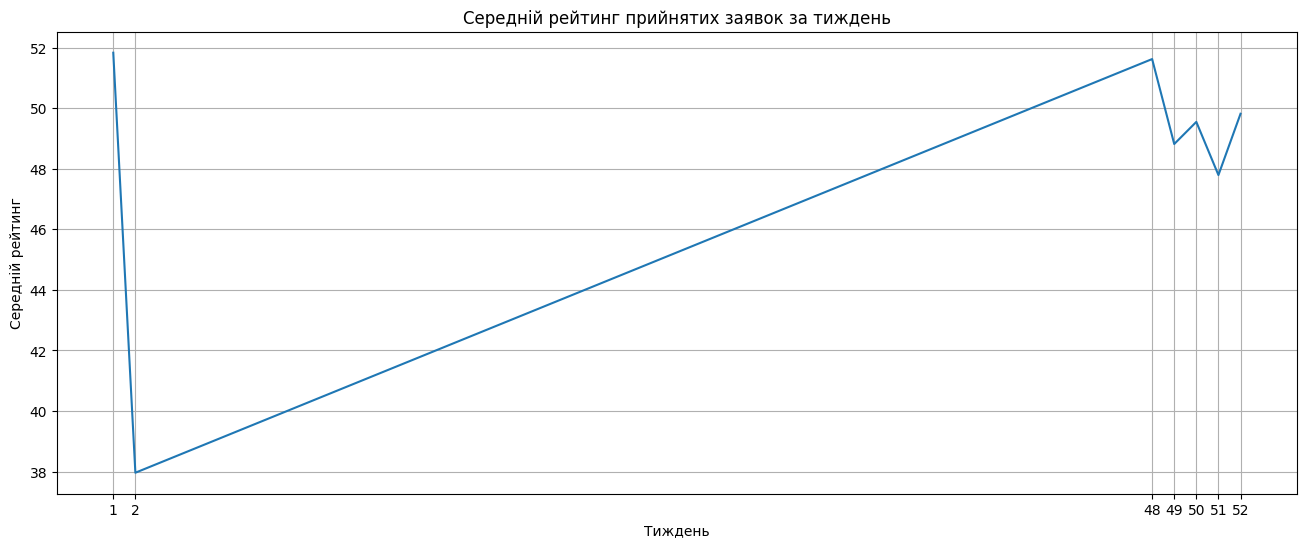

In [7]:
# 5. Дані з результуючої таблиці згрупуй за тижнем подачі заявки, та виведи на графік середній рейтинг прийнятих заявок у кожен тиждень.

df_accepted['Week'] = df_accepted['Applied at'].dt.strftime('%U').astype(int)
weekly_average_rating = df_accepted.groupby('Week')['Rating'].mean()

plt.figure(figsize=(16, 6))
plt.plot(weekly_average_rating.index, weekly_average_rating.values)
plt.title("Середній рейтинг прийнятих заявок за тиждень")
plt.xlabel("Тиждень")
plt.ylabel("Середній рейтинг")
plt.grid(True)
plt.xticks(weekly_average_rating.index)
plt.show()